In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [31]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [32]:
# Import the requests library.
import requests
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [33]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url


'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=29ff7dc24a1808cb9467c79a68920e97'

In [34]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | moron
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | teguise
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | souillac
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | nguiu
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 22 of Set 

Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | kenai
Processing Record 42 of Set 4 | chernogorsk
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | misratah
Processing Record 45 of Set 4 | sistranda
Processing Record 46 of Set 4 | matamoros
Processing Record 47 of Set 4 | moranbah
Processing Record 48 of Set 4 | maarianhamina
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | mehamn
Processing Record 1 of Set 5 | mentok
City not found. Skipping...
Processing Record 2 of Set 5 | satipo
Processing Record 3 of Set 5 | palm coast
Processing Record 4 of Set 5 | loandjili
Processing Record 5 of Set 5 | polunochnoye
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 8 of Set 5 | chuy
Processing Record 9 of Set 5 | san carlos de bariloche
Processing Record 10 of Set 5 | monrovia
Processing Record 11 of Set 5 | broken hill
Processing Record 12 of 

Processing Record 25 of Set 8 | bay city
Processing Record 26 of Set 8 | nacozari
Processing Record 27 of Set 8 | ayan
Processing Record 28 of Set 8 | belyy yar
Processing Record 29 of Set 8 | kerugoya
Processing Record 30 of Set 8 | izmir
Processing Record 31 of Set 8 | brigantine
Processing Record 32 of Set 8 | nome
Processing Record 33 of Set 8 | qaqortoq
Processing Record 34 of Set 8 | la ronge
Processing Record 35 of Set 8 | locri
Processing Record 36 of Set 8 | yulara
Processing Record 37 of Set 8 | port-gentil
Processing Record 38 of Set 8 | waconia
Processing Record 39 of Set 8 | palasa
Processing Record 40 of Set 8 | huescar
Processing Record 41 of Set 8 | asau
Processing Record 42 of Set 8 | nchelenge
Processing Record 43 of Set 8 | dali
Processing Record 44 of Set 8 | bitung
Processing Record 45 of Set 8 | waddan
Processing Record 46 of Set 8 | mlonggo
Processing Record 47 of Set 8 | pisco
Processing Record 48 of Set 8 | zhaotong
Processing Record 49 of Set 8 | griffith
Proc

Processing Record 13 of Set 12 | teya
Processing Record 14 of Set 12 | launceston
Processing Record 15 of Set 12 | gallup
Processing Record 16 of Set 12 | yeppoon
Processing Record 17 of Set 12 | lagos
Processing Record 18 of Set 12 | hermiston
Processing Record 19 of Set 12 | tulun
Processing Record 20 of Set 12 | bereda
Processing Record 21 of Set 12 | khonuu
City not found. Skipping...
Processing Record 22 of Set 12 | santiago
Processing Record 23 of Set 12 | vanimo
Processing Record 24 of Set 12 | rundu
Processing Record 25 of Set 12 | la uribe
City not found. Skipping...
Processing Record 26 of Set 12 | noumea
Processing Record 27 of Set 12 | garmsar
Processing Record 28 of Set 12 | roald
Processing Record 29 of Set 12 | camocim
Processing Record 30 of Set 12 | atambua
Processing Record 31 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 32 of Set 12 | ostersund
Processing Record 33 of Set 12 | turayf
Processing Record 34 of Set 12 | surgut
Processing Record 

In [35]:
len(city_data)

564

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,81.00,23,0,18.41,AU,2021-04-01 04:29:34
1,Moron,-34.6534,-58.6198,68.00,88,3,4.81,AR,2021-04-01 04:29:04
2,Mar Del Plata,-38.0023,-57.5575,66.00,93,93,8.55,AR,2021-04-01 04:29:12
3,Rikitea,-23.1203,-134.9692,78.91,72,100,17.02,PF,2021-04-01 04:31:39
4,Kavaratti,10.5669,72.6420,83.66,68,40,11.34,IN,2021-04-01 04:31:39
5,Teguise,29.0605,-13.5640,60.80,77,0,1.14,ES,2021-04-01 04:30:02
6,Nikolskoye,59.7035,30.7861,34.00,93,40,6.71,RU,2021-04-01 04:31:39
7,Souillac,-20.5167,57.5167,77.00,94,75,5.75,MU,2021-04-01 04:31:40
8,Iqaluit,63.7506,-68.5145,-5.01,71,75,25.32,CA,2021-04-01 04:29:45
9,Geraldton,-28.7667,114.6000,100.40,19,0,14.97,AU,2021-04-01 04:31:40


In [37]:
city_data_new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [38]:
city_data_df = city_data_df[city_data_new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-04-01 04:29:34,-42.8794,147.3294,81.00,23,0,18.41
1,Moron,AR,2021-04-01 04:29:04,-34.6534,-58.6198,68.00,88,3,4.81
2,Mar Del Plata,AR,2021-04-01 04:29:12,-38.0023,-57.5575,66.00,93,93,8.55
3,Rikitea,PF,2021-04-01 04:31:39,-23.1203,-134.9692,78.91,72,100,17.02
4,Kavaratti,IN,2021-04-01 04:31:39,10.5669,72.6420,83.66,68,40,11.34
5,Teguise,ES,2021-04-01 04:30:02,29.0605,-13.5640,60.80,77,0,1.14
6,Nikolskoye,RU,2021-04-01 04:31:39,59.7035,30.7861,34.00,93,40,6.71
7,Souillac,MU,2021-04-01 04:31:40,-20.5167,57.5167,77.00,94,75,5.75
8,Iqaluit,CA,2021-04-01 04:29:45,63.7506,-68.5145,-5.01,71,75,25.32
9,Geraldton,AU,2021-04-01 04:31:40,-28.7667,114.6000,100.40,19,0,14.97


In [39]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [41]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1617251666.394719

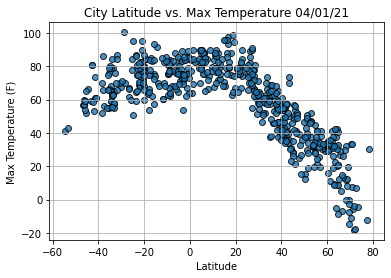

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

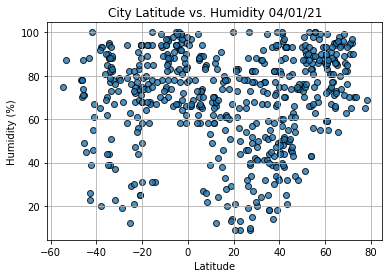

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

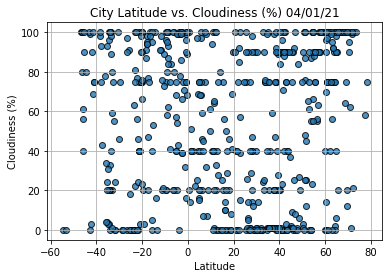

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

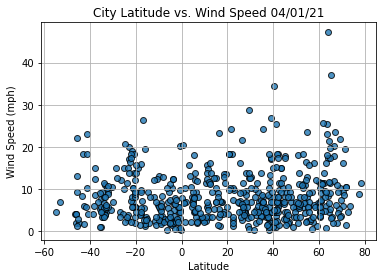

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [48]:

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [49]:
index13 = city_data_df.loc[13]
index13


City                  East London
Country                        ZA
Date          2021-04-01 04:31:41
Lat                      -33.0153
Lng                       27.9116
Max Temp                     64.4
Humidity                       82
Cloudiness                     20
Wind Speed                   4.61
Name: 13, dtype: object

In [50]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Kavaratti,IN,2021-04-01 04:31:39,10.5669,72.6420,83.66,68,40,11.34
5,Teguise,ES,2021-04-01 04:30:02,29.0605,-13.5640,60.80,77,0,1.14
6,Nikolskoye,RU,2021-04-01 04:31:39,59.7035,30.7861,34.00,93,40,6.71
8,Iqaluit,CA,2021-04-01 04:29:45,63.7506,-68.5145,-5.01,71,75,25.32
10,Bilibino,RU,2021-04-01 04:30:23,68.0546,166.4372,11.93,89,100,1.99


In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

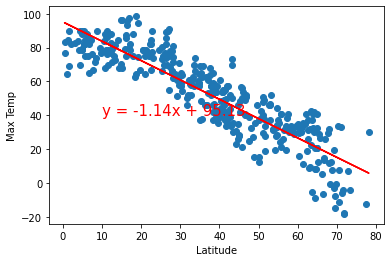

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

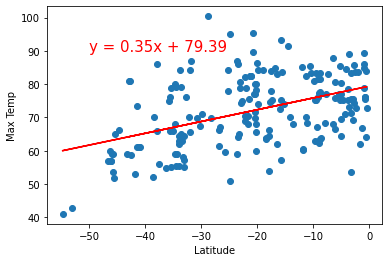

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

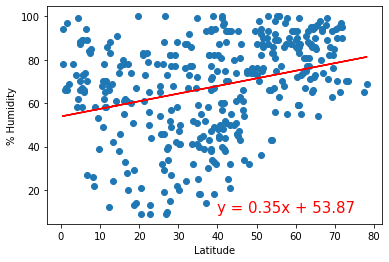

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [61]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
print(r_value)


0.30533999722154603


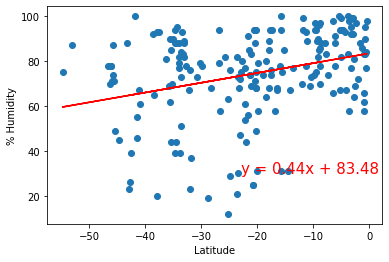

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-23,30))

In [66]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
print(r_value)

0.30215302995834803


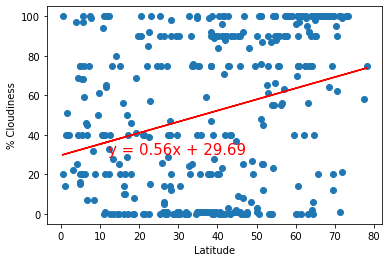

In [67]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(12,30))

In [68]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
print(r_value, p_value)

0.2902434071924199 1.4160481317420216e-08


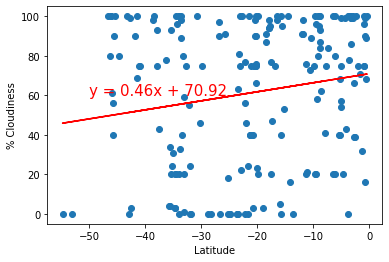

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [73]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
print(r_value, p_value)

0.17428608109690427 0.014560652159034942


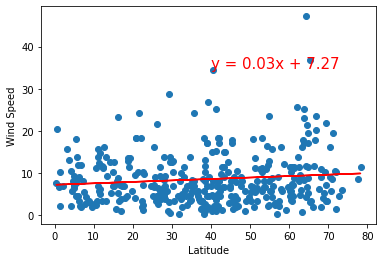

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


In [76]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
print(r_value, p_value)

0.10955381650278377 0.035659943498371725


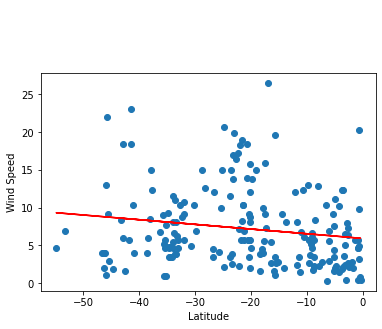

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [79]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
print(r_value, p_value)

-0.1653617705607958 0.020545940335752667
